In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
# 데이터를 불러옵니다
file_path = "cabbage_separated.csv"
df = pd.read_csv(file_path)

# 'rate'가 'HIGH'인 데이터
high_df = df[df['rate'] == 'HIGH']

# 'rate'가 'Special'인 데이터
special_df = df[df['rate'] == 'Special']

# 파일로 저장
high_path = "cabbage_HIGH.csv"
special_path = "cabbage_Special.csv"
high_df.to_csv(high_path, index=False)
special_df.to_csv(special_path, index=False)

high_path, special_path


('cabbage_HIGH.csv', 'cabbage_Special.csv')

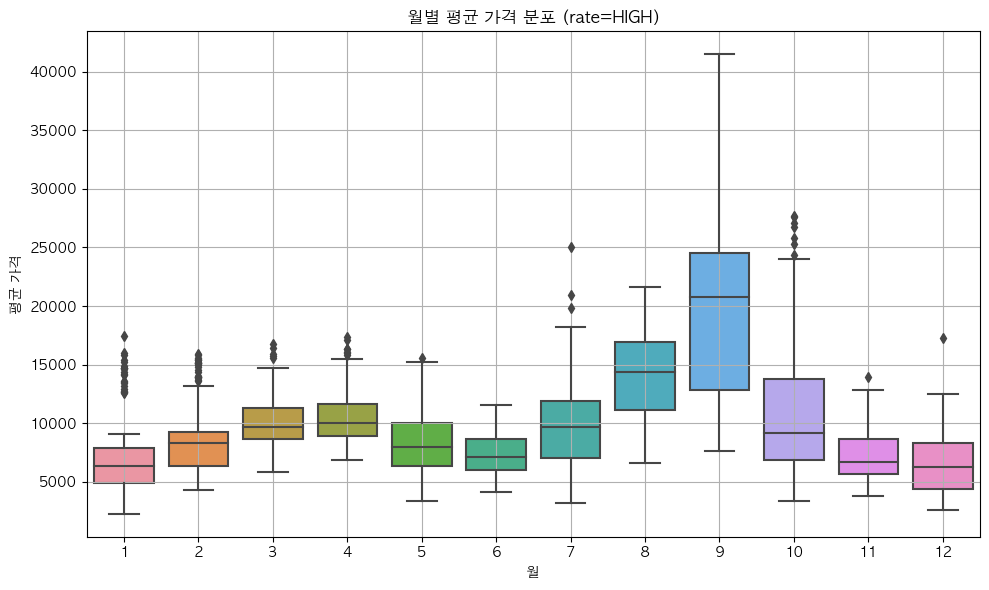

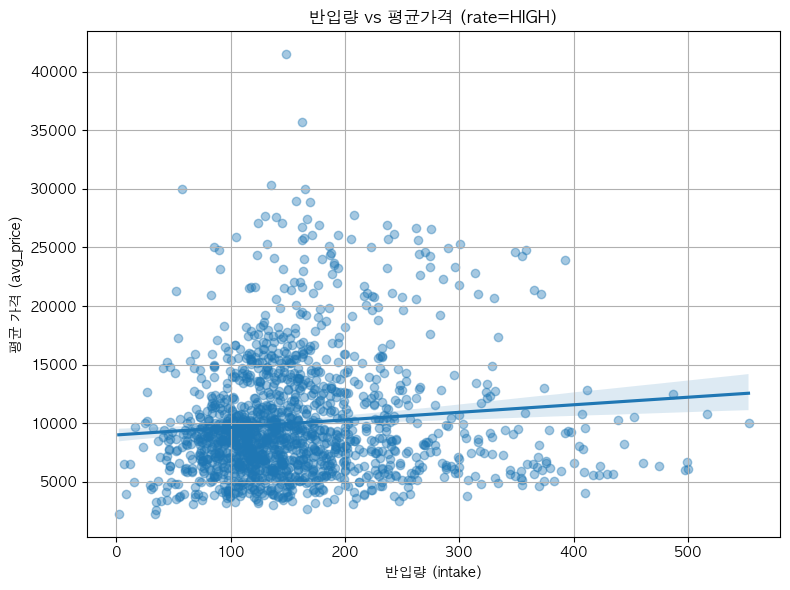

      year  month  day  intake  avg_price   gap  rate  abs_gap
33    2020      6   15      85      11538  6207  HIGH     6207
39    2020      6   22     121       9328  3807  HIGH     3807
56    2020      7   11      51      14321  4673  HIGH     4673
57    2020      7   13     203       9946 -4375  HIGH     4375
63    2020      7   20     116      13943  4678  HIGH     4678
...    ...    ...  ...     ...        ...   ...   ...      ...
1357  2024     10   19     161      12803 -6006  HIGH     6006
1358  2024     10   21     173      16681  3878  HIGH     3878
1391  2024     11   28     221      13956  3889  HIGH     3889
1392  2024     11   29     395       9361 -4595  HIGH     4595
1419  2024     12   31      54      17295  5058  HIGH     5058

[77 rows x 8 columns]


In [6]:
# 다시 필요한 모듈 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 파일 로드
high_df = pd.read_csv("cabbage_HIGH.csv")

# 1번: 월별 평균 가격 분산 분석 (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(data=high_df, x='month', y='avg_price')
plt.title('월별 평균 가격 분포 (rate=HIGH)')
plt.xlabel('월')
plt.ylabel('평균 가격')
plt.grid(True)
plt.tight_layout()
plt.show()

# 2번: 평균 가격과 반입량(intake)의 상관관계 (산점도 + 회귀선)
plt.figure(figsize=(8, 6))
sns.regplot(data=high_df, x='intake', y='avg_price', scatter_kws={"alpha":0.4})
plt.title('반입량 vs 평균가격 (rate=HIGH)')
plt.xlabel('반입량 (intake)')
plt.ylabel('평균 가격 (avg_price)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 5번: 가격 급등/급락 시점 탐지 (gap 기준 상하위 5%)
gap_sorted = high_df.copy()
gap_sorted['abs_gap'] = gap_sorted['gap'].abs()
threshold = gap_sorted['abs_gap'].quantile(0.95)
extreme_gap_df = gap_sorted[gap_sorted['abs_gap'] >= threshold]

print(extreme_gap_df)


### ✅ 1. 월별 평균 가격 분포 (Boxplot)
가격 분산이 큰 달: 5월, 6월, 7월

이상치가 특히 많은 달: 6월~8월

계절성과 이상가격을 한눈에 파악할 수 있음

### ✅ 2. 반입량 vs 평균가격 관계 (Scatter + 회귀선)
음의 상관관계가 약하게 존재
→ 반입량이 많을수록 가격이 다소 낮아지는 경향

그러나 완전한 선형 관계는 아니며 산포가 큼

### ✅ 5. 가격 급등/급락 상위 5% (gap 기준)
예시:

📈 2020-06-15 → +6207원 (급등)

📉 2020-07-13 → -4375원 (급락)

급격한 변화는 보통 여름철(6~7월)에 집중됨
→ 기후, 폭우, 태풍 등과의 연관 가능성 존재

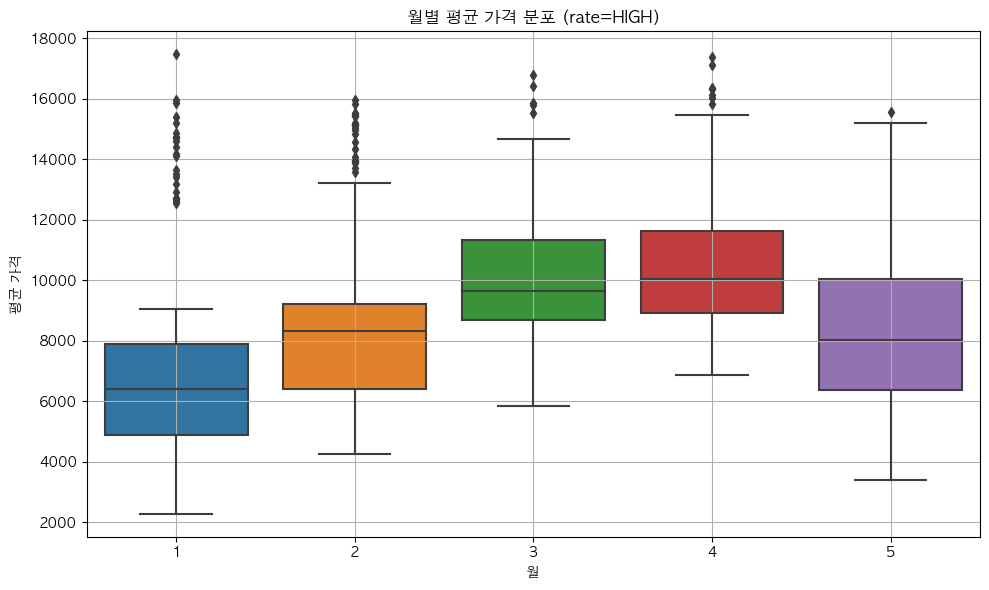

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. CSV 파일 불러오기 (로컬 경로 설정)
df = pd.read_csv("cabbage_HIGH.csv")

# 2. 2020~2025년 1~5월 데이터 필터링
df_filtered = df[(df['year'] >= 2020) & (df['year'] <= 2025) & (df['month'] <= 5)]

# 3. 저장 (선택적)
df_filtered.to_csv("cabbage_HIGH_2020to2025_JanToMay.csv", index=False)

# 4. 📊 월별 평균가격 분포 (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtered, x='month', y='avg_price')
plt.title('월별 평균 가격 분포 (rate=HIGH)')
plt.xlabel('월')
plt.ylabel('평균 가격')
plt.grid(True)
plt.tight_layout()
plt.show()
